In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import zipfile
from sklearn.model_selection import train_test_split
from random import randrange

print(tf.__version__)

2.9.1


In [2]:
local_zip = './digit-recognizer.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')

Extracting pixel from csv using pandas

In [3]:
sample = pd.read_csv('./train.csv')

#split training and validation set
training_sample, validation_sample = train_test_split(sample, test_size=0.15, random_state=30)
training_sample_size = training_sample.shape[0]
validation_sample_size = validation_sample.shape[0]

train_pixel = training_sample.drop('label', axis=1).to_numpy().reshape(training_sample_size, 28, 28)
train_label = training_sample['label'].to_numpy()
validation_pixel = validation_sample.drop('label', axis=1).to_numpy().reshape(validation_sample_size, 28, 28)
validation_label = validation_sample['label'].to_numpy()

(35700, 28, 28)
int64
8
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.      

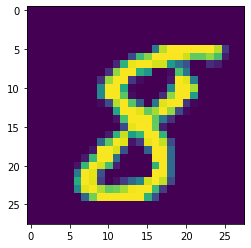

In [13]:
#print the shape and example index
index = randrange(0, training_sample_size)

np.set_printoptions(linewidth=320)
print(train_pixel.shape)
print(train_label.dtype)
print(train_label[index])
print(train_pixel[index])

# Visualize the image
plt.imshow(train_pixel[index])

In [5]:
test_sample = pd.read_csv('./test.csv').to_numpy().reshape(28000, 28, 28)

In [6]:
#normalize pixel
train_pixel = train_pixel / 255
validation_pixel = validation_pixel / 255
test_sample = test_sample / 255

In [7]:
from gc import callbacks


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.keras.activations.relu),
                                    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
                                    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
                                    ])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            print('\nstop training because accuracy has exceeded 99%')
            self.model.stop_training = True
callbacks = MyCallback()

model.fit(train_pixel, train_label, epochs=10, validation_data=(validation_pixel, validation_label), callbacks=[callbacks])

Epoch 1/10
1116/1116 [==============================] - 5s 4ms/step - loss: 0.2333 - accuracy: 0.9285 - val_loss: 0.1416 - val_accuracy: 0.9575
Epoch 2/10
1116/1116 [==============================] - 5s 4ms/step - loss: 0.0925 - accuracy: 0.9711 - val_loss: 0.1184 - val_accuracy: 0.9638
Epoch 3/10
1116/1116 [==============================] - 5s 4ms/step - loss: 0.0597 - accuracy: 0.9806 - val_loss: 0.0993 - val_accuracy: 0.9708
Epoch 4/10
1116/1116 [==============================] - 4s 4ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.1083 - val_accuracy: 0.9697
Epoch 5/10
1116/1116 [==============================] - 5s 4ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.1018 - val_accuracy: 0.9741
Epoch 6/10
1111/1116 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9905
stop training because accuracy has exceeded 99%
1116/1116 [==============================] - 5s 4ms/step - loss: 0.0281 - accuracy: 0.9905 - val_loss: 0.1075 - val_accuracy: 0.9719


In [8]:
classification = model.predict(test_sample)

875/875 [==============================] - 2s 2ms/step


the image has the number of: 9


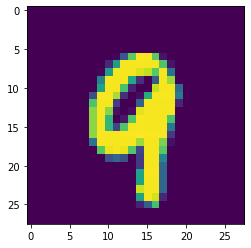

In [41]:
index = randrange(0, test_sample.shape[0])
plt.imshow(test_sample[index])
answer = np.argmax(classification[index])
print(f'the image has the number of: {answer}')